In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
img = cv2.imread("flowers.png")

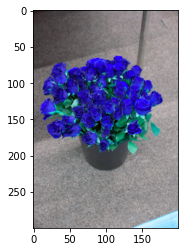

In [3]:
plt.imshow(img)

/Users/eliz/opt/anaconda3/lib/python3.9/site-packages/google/colab/data_table.py:30: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  from IPython.utils import traitlets as _traitlets


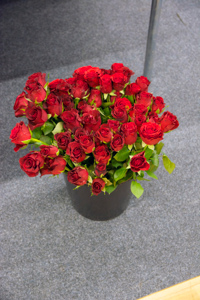

In [4]:
img = cv2.imread("flowers.png")
from google.colab.patches import cv2_imshow 
cv2_imshow(img)

In [5]:
img = plt.imread("flowers.png")

In [6]:
print("maximum pixel value in the image: {}".format(np.max(img)))
print("minimum pixel value in the image: {}".format(np.min(img)))

maximum pixel value in the image: 1.0
minimum pixel value in the image: 0.0


### Take the average pixel value of our image and display it

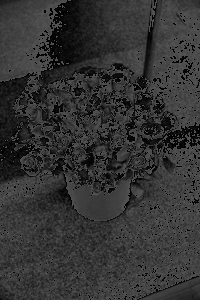

52.08811111111112

In [7]:
img = cv2.imread("flowers.png")
from google.colab.patches import cv2_imshow 
grayscale_average_img = ((img[:,:,0]+img[:,:,1]+img[:,:,2])/3)
cv2_imshow(grayscale_average_img)
np.average(grayscale_average_img)



### Black and white image

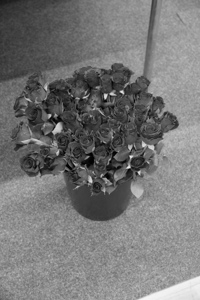

In [8]:
img = cv2.imread("flowers.png")
cv2_imshow(cv2.cvtColor(img,cv2.COLOR_BGR2GRAY))

### Weighted average

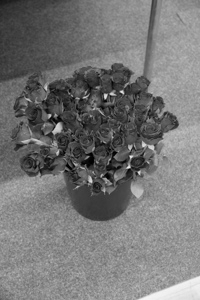

In [9]:
img2 = cv2.imread("flowers.png")
B, G, R = img2[:,:,0], img2[:,:,1],img2[:,:,2]
Y = 0.299 * R + 0.587 * G + 0.114 * B
img2=Y
cv2_imshow(img2)


In [10]:
# let's get the reference for pure red

red_rgb = np.uint8([[[255,0,0 ]]]) #pure red in an RGB 
red_hsv = cv2.cvtColor(red_rgb,cv2.COLOR_RGB2HSV)

# let's see its value in HSV!

print("value for pure red color in HSV format: {}".format(red_hsv))

value for pure red color in HSV format: [[[  0 255 255]]]


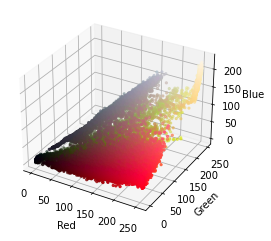

In [11]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors


baimg = cv2.imread("flowers.png")
img = cv2.cvtColor(baimg, cv2.COLOR_BGR2RGB)

r, g, b = cv2.split(img)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = img.reshape((np.shape(img)[0]*np.shape(img)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

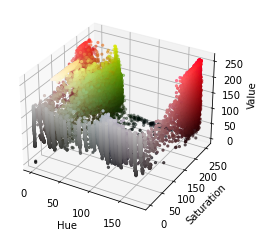

In [12]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors


baimg = cv2.imread("flowers.png")
img = cv2.cvtColor(baimg, cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

h, s, v = cv2.split(img3)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


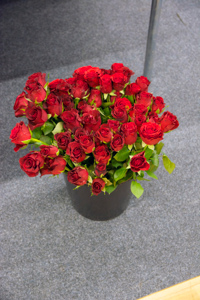

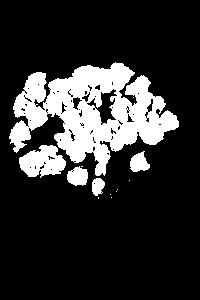

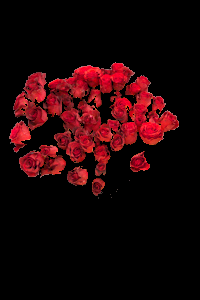

In [13]:
img = cv2.imread("flowers.png")
# We first transform our image to HSV

img3 = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

# We then get our boundary region based on the Hue image from before 
# We see that red should be in the range (0-10) and (170-180)

# lower boundary RED color range values; Hue (0 - 10)
lower1 = np.array([0, 50, 50]) 
upper1 = np.array([10, 255, 255])
 
# upper boundary RED color range values; Hue (160 - 180)
lower2 = np.array([169,50,50])
upper2 = np.array([179,255,255])

# notice in the code above the values for saturation and brightness
# we have to still set some lower and upper boundary for these based on how dark and intense the color of our images are
# these values will affect the noise from dark regions/colors and of course the accuracy of our filter
 
# we create a mask representing the pixel that falls in our especified range
lower_mask = cv2.inRange(img3, lower1, upper1)
upper_mask = cv2.inRange(img3, lower2, upper2)
 
# we combine the mask from both regions to create a unique mask
# notice that we have to do this because of the "cut" for the red color in HSV
full_mask = lower_mask + upper_mask;
print(full_mask)

# Here we filter the pixels in the image with our mask
img3 = cv2.bitwise_and(img3, img3, mask=full_mask)

# we show back our images
cv2_imshow(img)
cv2_imshow(full_mask)
img3 = cv2.cvtColor(img3,cv2.COLOR_HSV2BGR)
cv2_imshow(img3)



### Image Filtering

In [14]:
img = cv2.imread("placa.jpg")
img2 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# we define our sigma and create the grid for our filter

sigma = 2
x, y = np.meshgrid(np.arange(np.floor(-3*sigma),np.ceil(3*sigma+1),1), np.arange(np.ceil(-3*sigma),np.ceil(3*sigma+1),1))

# create the actual filter
filt = np.exp(-( (x**2+y**2) / ( 2.0 * sigma**2 ) ) )
filt = filt/np.sum(filt)


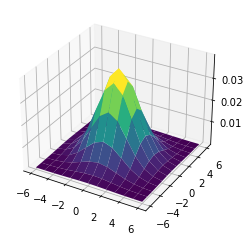

In [15]:
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, filt,cmap='viridis', edgecolor='none')

Text(0.5, 1.0, 'blurred image')

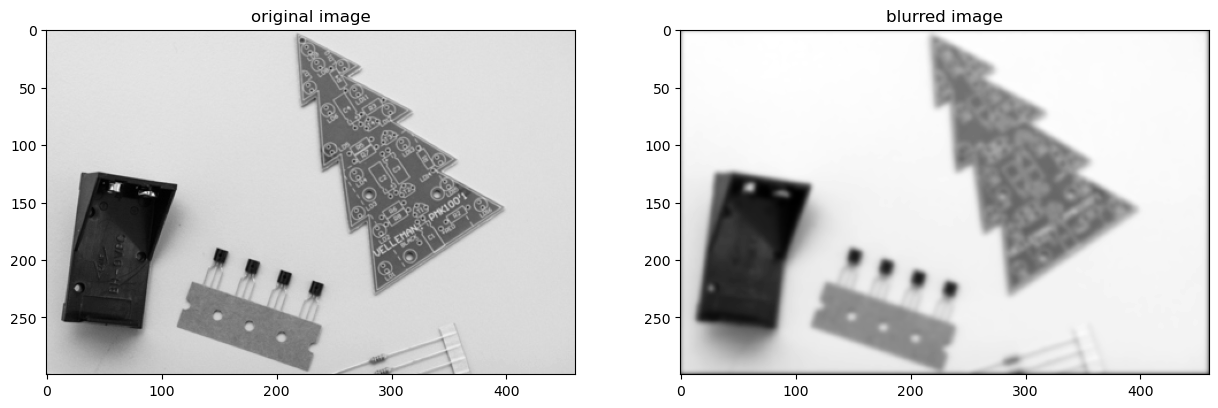

In [16]:
res = cv2.filter2D(img2,-1,filt,borderType=cv2.BORDER_CONSTANT)

fig = plt.figure(figsize=(15, 12), dpi=100)
ax = fig.add_subplot(1, 2, 1)
plt.imshow(img2,cmap="gray")
ax.set_title('original image')
ax = fig.add_subplot(1,2,2)
plt.imshow(res,cmap="gray")
ax.set_title("blurred image")

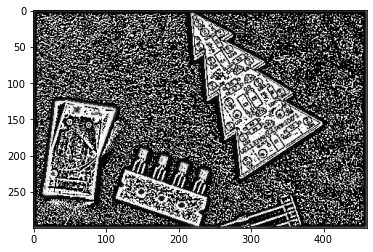

In [17]:
plt.imshow(img2-res,cmap="gray")

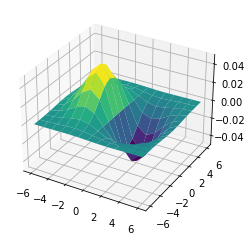

In [18]:
# we define our sigma and create the grid for our filter

sigma = 2
x, y = np.meshgrid(np.arange(np.ceil(-3*sigma),np.ceil(3*sigma+1),1), np.arange(np.ceil(-3*sigma),np.ceil(3*sigma+1),1))

# create the actual filter
filtx = -x*np.exp(-( (x**2+y**2) / ( 2.0 * sigma**2 ) ) )/(2*np.pi*sigma**2)
filty = np.transpose(filtx)

ax = plt.axes(projection='3d')

ax.plot_surface(x, y, filtx,cmap='viridis', edgecolor='none')


Text(0.5, 1.0, 'all')

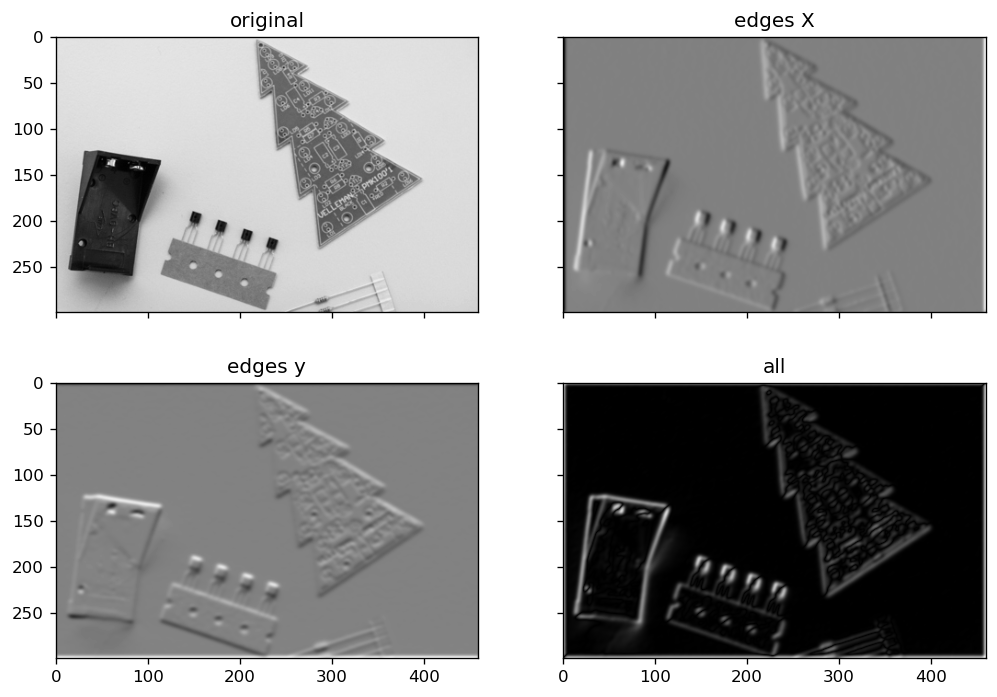

In [19]:
# since edge images can have negative values, we need to cast our image to float or int in order to keep those values
edgex = cv2.filter2D(img2.astype("float"),-1,filtx,borderType=cv2.BORDER_CONSTANT) 
edgey = cv2.filter2D(img2.astype("float"),-1,filty,borderType=cv2.BORDER_CONSTANT) 

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 7), dpi=120, sharex=True, sharey=True)
ax[0,0].imshow(img2, cmap='gray')
ax[0,0].set_title('original')

ax[0,1].imshow(edgex, cmap='gray')
ax[0,1].set_title("edges X")

ax[1,0].imshow(edgey, cmap='gray')
ax[1,0].set_title('edges y')

ax[1,1].imshow(np.abs(edgex+edgey), cmap='gray')
ax[1,1].set_title("all")

# why edgex and edgey looks very gray in comparison to the full edge image?

Text(0.5, 1.0, 'original')

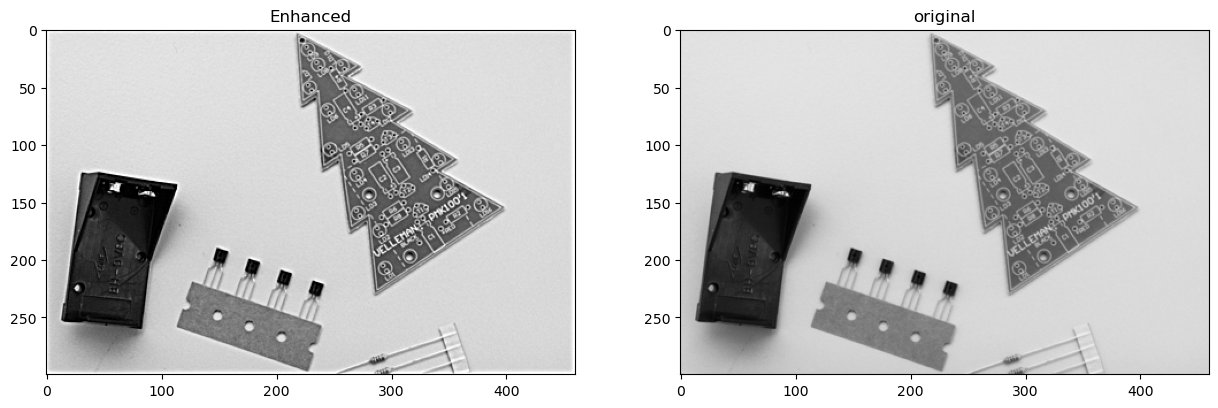

In [20]:
# analyze the next line, why does this enhance the contrast?
enhanced = np.clip(2*img2.astype("float") - res,0,255) # we need to cast our image to a bigger format to avoid overflow and then clip the values to keep them in the [0,255] range
fig = plt.figure(figsize=(15, 12), dpi=100)
ax = fig.add_subplot(1, 2, 1)
plt.imshow(enhanced,cmap="gray")
ax.set_title('Enhanced')
ax = fig.add_subplot(1,2,2)
plt.imshow(img2,cmap="gray")
ax.set_title("original")

Text(0.5, 1.0, 'Contrast enhancing')

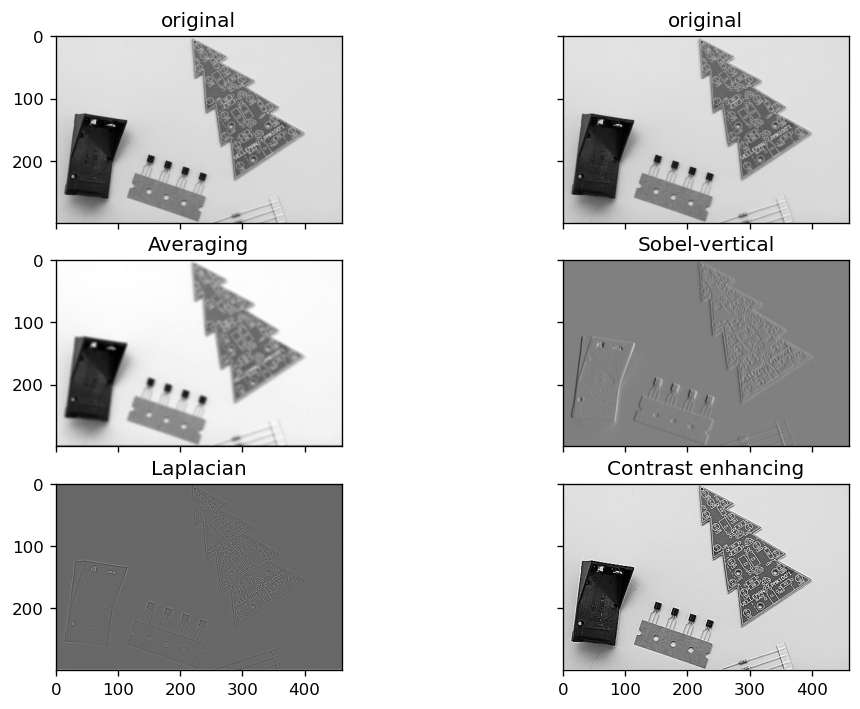

In [21]:
img = cv2.imread("placa.jpg")
img2 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


averaging = np.ones((5,5))/25
sobel = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
laplacian = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
contrast = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])

res_averaging = cv2.filter2D(img2,-1,averaging,borderType=cv2.BORDER_CONSTANT)
res_sobel = cv2.filter2D(img2.astype("float"),-1,sobel,borderType=cv2.BORDER_CONSTANT)
res_lap = cv2.filter2D(img2.astype("float"),-1,laplacian,borderType=cv2.BORDER_CONSTANT)
res_cont = np.clip(cv2.filter2D(img2,-1,contrast,borderType=cv2.BORDER_CONSTANT),0,255)

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 7), dpi=120, sharex=True, sharey=True)
ax[0,0].imshow(img2,cmap="gray")
ax[0,0].set_title('original')

ax[0,1].imshow(img2,cmap="gray")
ax[0,1].set_title('original')

ax[1,0].imshow(res_averaging,cmap="gray")
ax[1,0].set_title("Averaging")

ax[1,1].imshow(res_sobel, cmap='gray')
ax[1,1].set_title('Sobel-vertical')

ax[2,0].imshow(res_lap, cmap='gray')
ax[2,0].set_title("Laplacian")

ax[2,1].imshow(res_cont,cmap="gray")
ax[2,1].set_title("Contrast enhancing")

# Homework


### Use the code in the color section to segment out the X color in image Y

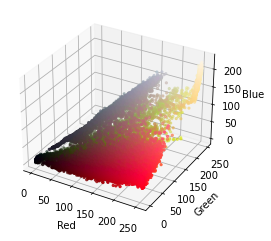

In [22]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors


baimg = cv2.imread("flowers.png")
img = cv2.cvtColor(baimg, cv2.COLOR_BGR2RGB)

r, g, b = cv2.split(img)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = img.reshape((np.shape(img)[0]*np.shape(img)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

ValueError: 'c' argument has 60000 elements, which is inconsistent with 'x' and 'y' with size 138000.

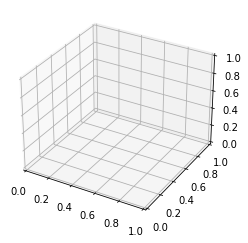

In [23]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors


baimg = cv2.imread("placa.jpg")
img = cv2.cvtColor(baimg, cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

h, s, v = cv2.split(img3)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In [ ]:
# Segment out all pixels with green color
# Notice that the segmentation do not need to be perfect
# Use image "placa.jpg"
# you can use most of the code from the segmentation of roses from before


img_color = cv2.imread("placa.jpg")
# TO DO


# We first transform our image to HSV

img3 = cv2.cvtColor(img_color,cv2.COLOR_BGR2HSV)

# We then get our boundary region based on the Hue image from before 
# We see that green should be in the range (36-80)

# Green color range values; Hue (36-80)
lower = np.array([36, 50, 50]) 
upper = np.array([80, 255, 255])
 
# we create a mask representing the pixel that falls in our especified range
mask = cv2.inRange(img3, lower, upper)
 

# Here we filter the pixels in the image with our mask
img3 = cv2.bitwise_and(img3, img3, mask=mask)


# we show back our images
cv2_imshow(img_color)
cv2_imshow(mask)
img3 = cv2.cvtColor(img3,cv2.COLOR_HSV2BGR)
cv2_imshow(img3)

### Convolution between an image and a filter

Implement a function that does the convolution between an image and a filter. The output of this convolution has to be of the same size as the input image. Use constant padding with value 0, and consider that the images will be in grayscale


In [ ]:
from numpy.lib.stride_tricks import as_strided

img = cv2.imread("placa.jpg")
img2 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

def myconv(img,filt):
    print(filt.shape)
    #add 2 pixel border around img
    img =  cv2.copyMakeBorder(img,2, 2, 2,2, cv2.BORDER_CONSTANT, None, value = 0)
    
    #creating submatrixes with the size of the kernel
    view_shape = tuple(np.subtract(img.shape, filt.shape) + 1) + filt.shape
    matrices = as_strided(img, view_shape, img.strides * 2)
    matrices = matrices.reshape((-1,) + filt.shape)
    
    #multiplying the kernel to the submatrixes to get the blurred image
    transform_mat = []
    for each_mat in matrices:
        transform_mat.append(
            np.sum(np.multiply(each_mat, filt))
        )
    
    transform_mat = np.array(transform_mat)
    print(transform_mat)
    transform_mat = transform_mat.reshape(300,460)
    return  transform_mat
                            
                      
averaging = np.ones((5,5))/25

myout = myconv(img2,averaging)

out_check = cv2.filter2D(img2,-1,averaging,borderType=cv2.BORDER_CONSTANT)

myout = myconv(img2,averaging)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), dpi=150, sharex=True, sharey=True)
ax[0].imshow(img2,cmap="gray")
ax[0].set_title('original')

ax[1].imshow(out_check,cmap="gray")
ax[1].set_title("check")

ax[2].imshow(myout,cmap="gray")
ax[2].set_title("My solution")

#L2-error
error = np.sum((img2-out_check)**2)/img2.size
error2 = np.sum((img2-myout)**2)/img2.size
print("error between original and blurred with opencv filter function: {}".format(error))
print("error between original and blurred with my filter function: {}".format(error2))

### Median Filter

create another function similar to the previous one that applies a median filter to the image.

In [ ]:
img = cv2.imread("placa.jpg")
img2 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

probnoise = 0.30
noise = np.random.rand(img2.shape[0],img2.shape[1])
black = noise <= probnoise/2
white = noise >= 1-probnoise/2

imnoise = img2.copy()
imnoise[black]=0
imnoise[white]=255

# IMPORTANT!! Update the padding function to do BORDER_REPLICATE (opencv border type, but it is the same concept as "CLAMP" in the image above about padding in this same lab file)
def medianfilter(imnoise):
       
    #add 2 pixel border around img
    imnoise =  cv2.copyMakeBorder(imnoise,2, 2, 2,2, cv2.BORDER_REPLICATE, None, value = 0)
    
    size=(5,5)
    #creating submatrixes
    view_shape = tuple(np.subtract(imnoise.shape, size) + 1) + size
    matrices = as_strided(imnoise, view_shape, imnoise.strides * 2)
    matrices = matrices.reshape((-1,) + size)
    
    print(np.median(matrices[15]))
    
    
    #finding the median within each submatrix and appending it to a new matrix for our final result
    transform_mat = []
    for each_mat in matrices:
        transform_mat.append(
        np.median(each_mat))
        
    print(transform_mat[15])
    
    transform_mat = np.array(transform_mat)
    transform_mat = transform_mat.reshape(300,460)
    return  transform_mat


cleanout = medianfilter(imnoise)

sol_median = cv2.medianBlur(img2,5)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), dpi=150, sharex=True, sharey=True)
ax[0].imshow(imnoise,cmap="gray")
ax[0].set_title('Noisy image')

ax[1].imshow(sol_median,cmap="gray")
ax[1].set_title("Cleaned image")

ax[2].imshow(cleanout,cmap="gray")
ax[2].set_title("My solution")

#L2-error
error = np.sum((img2-sol_median)**2)/img2.size
error_mine = np.sum((img2-cleanout)**2)/img2.size
print("error between original clean image and solution with opencv median filter: {}".format(error))
# why do you think there is still such a high error between the original image and the clean one if it looks good??
print("error between original clean image and my solution: {}".format(error_mine))
print("difference between opencv solution and mine: {}".format(np.sum((sol_median-cleanout)**2)/img2.size))